In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Mendoza Hernandez Carlos Emiliano**

# DBSCAN

*Density Based Spacial Clustering of Applications with Noise*, es un algoritmo de agrupamiento basado en densidad: define los grupos como regiones continuas de alta densidad.

Esta técnica clasifica los puntos como **punto núcleo** *(core points)* (densamente alcanzables) o **anomalías** de la forma siguiente:

- Para cada elemento del conjunto de datos, contar cuántos puntos se encuentran a una distancia pequeña *$\epsilon$*, conocida como *$\epsilon$*-vecindario; si un elemento contiene más de cierto umbral *min* dentro de su *$\epsilon$* vecindario, se considera como un **punto nucleo** *(core point)*.

- Todos los elementos en el *$\epsilon$*-vecindario de un punto nucleo pertenecen al mismo grupo, puede incluir otros *core points*. Los puntos alcanzables que no tienen mas de *min* elementos en su *$\epsilon$*-vecindario son llamados **puntos frontera** *(border points)*

- Cualquier elemento que no pertenezca a algun grupo, se considera como una **anomalia** o ruido *(noise point)*. 

**Elección de parámetros**
- El valor para $min$ puede ser obtenido a partir de la dimensionalidad de los puntos $p$ como $min \geq p+1$; cuanto mas grande sea el conjunto de datos, mayor debe ser el valor asignado a $min$.
- Idealmente, el valor $\epsilon$ esta dado por el problema a resolver, p.e. una distancia física. Cuando esto no sea el caso, debe tenerse en cuenta que un valor de $\epsilon$ pequeño puede provocar que muchos datos no se agrupen, mientras que con un valor grande de los grupos se fusionarán y la mayoría de los elementos podrían quedar dentro de un solo grupo.

## Tarea

Implementar desde cero el algoritmo *Density Based Spacial Clustering of Applications with Noise* (DBSCAN) utilizando las distancias:
1. Euclideana, Manhattan y coseno para datos numéricos.
2. Al menos una para datos categóricos.

### Funciones de distancia:

- Euclideana:

$$d(p,q) = \sqrt{\sum_{i=1}^{n}(p_i-q_i)^2}$$

- Manhattan:

$$d(p,q) = \sum_{i=1}^{n}|p_i-q_1|$$

- Coseno:

$$d(p,q) = 1 - \frac{\hat{p}\cdot\hat{q}}{||\hat{p}||||\hat{q}||}$$

- Hamming:

$$d(p,q) = \sum_{i=1}^{n} \mathbf{1}_{(p_i \neq q_1)}$$

In [10]:
class DBSCAN:
    def __init__(self, eps, min_pts, metric) -> None:
        self.eps = eps
        self.min_pts = min_pts
        self.metric = metric
        self.labels = None

    def euclidean_distance(self, p, q):
        return np.linalg.norm(p-q)

    def manhattan_distance(self, p, q):
        return np.sum(np.abs(p-q))

    def cosine_distance(self, p, q):
        return 1 - (np.dot(p, q)/(np.linalg.norm(p)*np.linalg.norm(q)))

    def hamming_distance(self, p, q):
        return np.sum(p!=q)
    
    def get_distance(self, p, q):
        if self.metric == 'euclidean':
            return self.euclidean_distance(p, q)
        elif self.metric == 'manhattan':
            return self.manhattan_distance(p, q)
        elif self.metric == 'cosine':
            return self.cosine_distance(p, q)
        elif self.metric == 'hamming':
            return self.hamming_distance(p, q)

    def get_neighbours(self, X, p):
        neighbours = []
        for i, point in enumerate(X):
            if self.get_distance(X[p], point) <= self.eps:
                neighbours.append(i)
        return neighbours
    
    def fit(self, X):
        n = len(X)
        visited = np.zeros(n, dtype=bool)
        self.labels = np.zeros(n, dtype=int)
        cluster = 0

        for i in range(n):
            if visited[i]:
                continue
            visited[i] = True
            neighbours = self.get_neighbours(X, i)
            if len(neighbours) < self.min_pts:
                self.labels[i] = -1
            else:
                self.labels[i] = cluster
                j=0
                while j < len(neighbours):
                    p = neighbours[j]
                    if not visited[p]:
                        visited[p] = True
                        new_neighbours = self.get_neighbours(X, p)
                        if len(new_neighbours) >= self.min_pts:
                            neighbours += [n for n in new_neighbours if n not in neighbours]
                    if self.labels[p] == 0 or self.labels[p] == -1:
                        self.labels[p] = cluster
                    j += 1
                cluster += 1

In [11]:
df = pd.read_csv('winequality.csv')
print(df.shape)
df.head()

(6463, 13)


,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
data = df.iloc[:, 1:3]
print(data.shape)
data.head()

(6463, 2)


,fixed acidity,volatile acidity
0,7.0,0.27
1,6.3,0.30
2,8.1,0.28
3,7.2,0.23
4,7.2,0.23


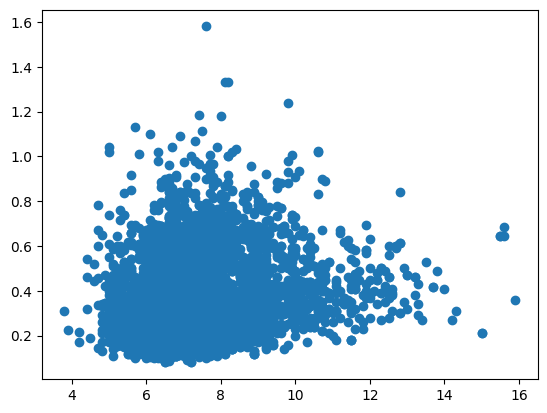

In [13]:
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.show()

In [14]:
dbs_n = DBSCAN(eps=0.2, min_pts=20, metric='euclidean')
dbs_n.fit(data.values)
from collections import Counter
print(Counter(dbs_n.labels))

Counter({np.int64(0): 6281, np.int64(-1): 117, np.int64(1): 40, np.int64(2): 25})


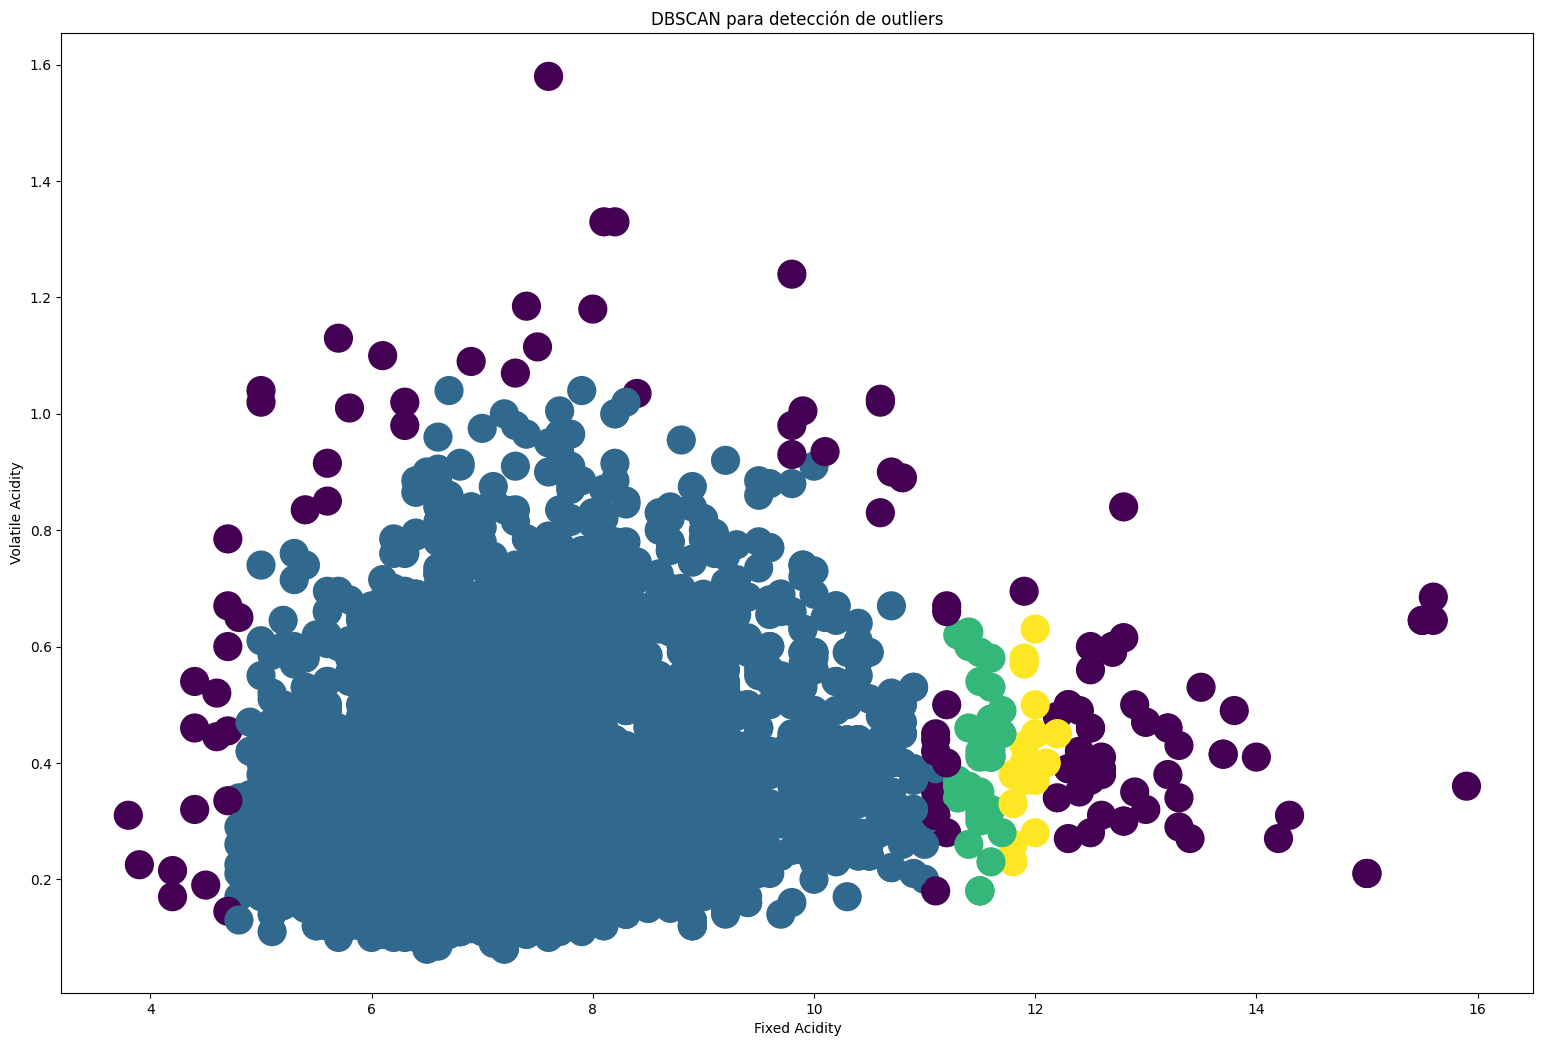

In [15]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 2.3, 2])
ax.scatter(data.iloc[:,0], data.iloc[:,1], c=dbs_n.labels, s=400)
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
plt.title('DBSCAN para detección de outliers')
plt.show()

In [16]:
dbs_n = DBSCAN(eps=0.2, min_pts=20, metric='manhattan')
dbs_n.fit(data.values)
from collections import Counter
print(Counter(dbs_n.labels))

Counter({np.int64(0): 6260, np.int64(-1): 177, np.int64(1): 26})


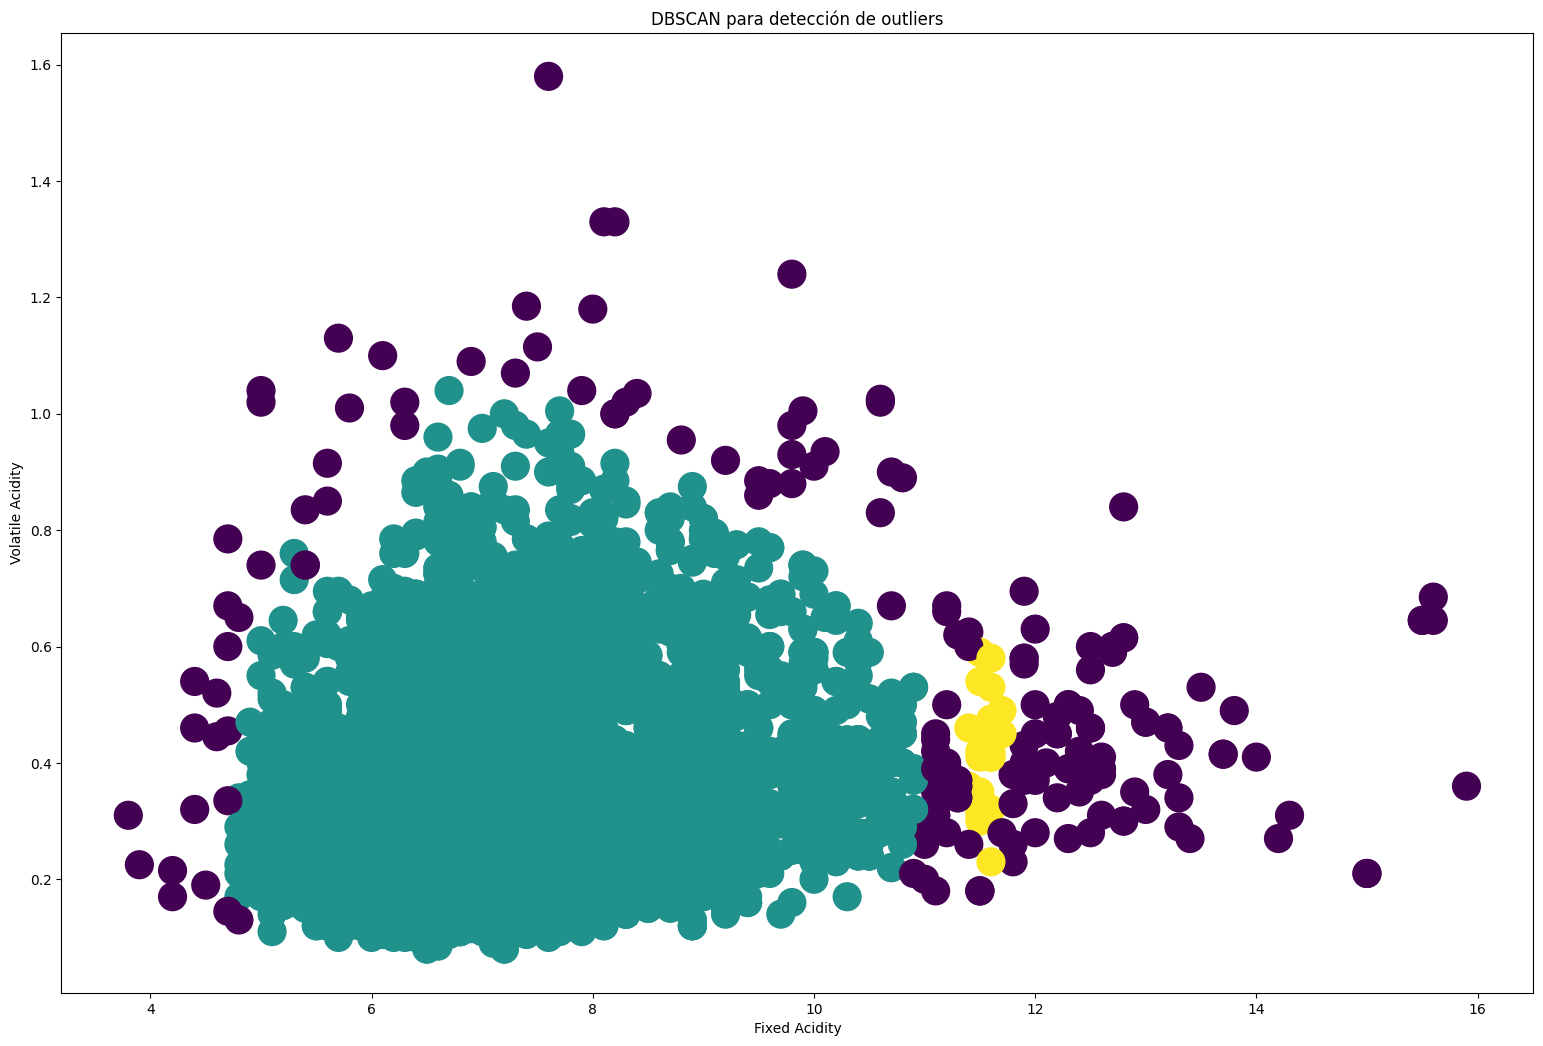

In [17]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 2.3, 2])
ax.scatter(data.iloc[:,0], data.iloc[:,1], c=dbs_n.labels, s=400)
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
plt.title('DBSCAN para detección de outliers')
plt.show()

In [18]:
dbs_n = DBSCAN(eps=0.0000001, min_pts=5, metric='cosine')
dbs_n.fit(data.values)
from collections import Counter
print(Counter(dbs_n.labels))

Counter({np.int64(0): 4230, np.int64(1): 1933, np.int64(-1): 74, np.int64(4): 73, np.int64(2): 40, np.int64(5): 26, np.int64(3): 23, np.int64(8): 14, np.int64(6): 10, np.int64(9): 8, np.int64(10): 7, np.int64(11): 7, np.int64(12): 7, np.int64(7): 6, np.int64(13): 5})


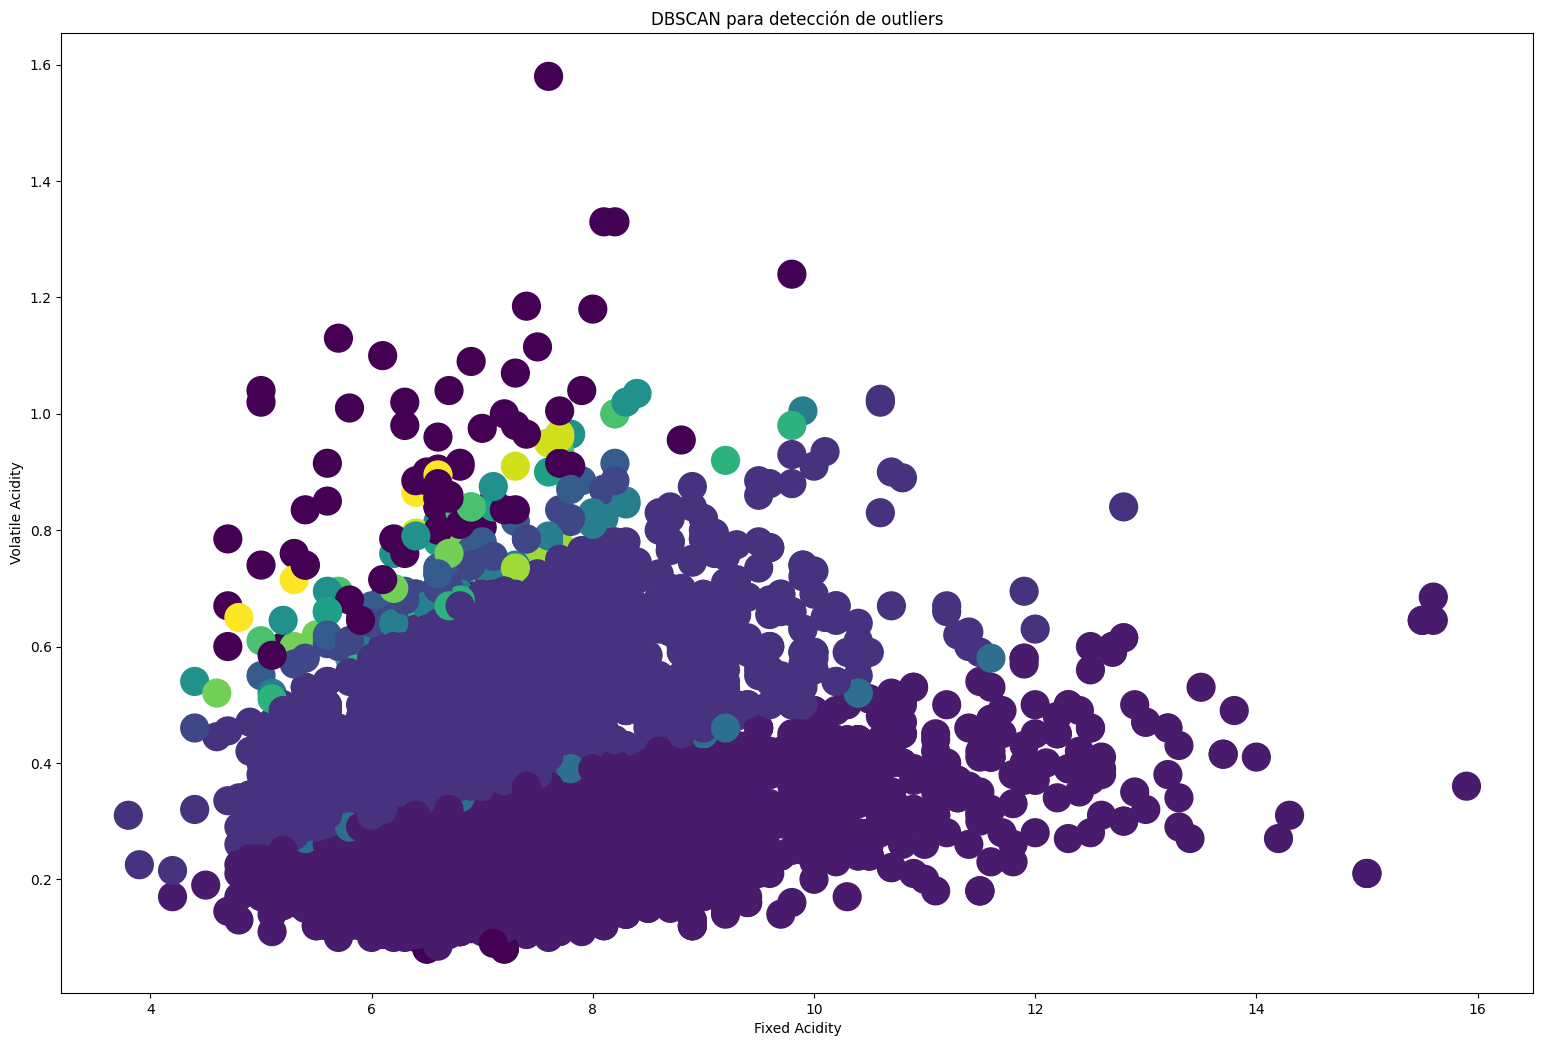

In [19]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 2.3, 2])
ax.scatter(data.iloc[:,0], data.iloc[:,1], c=dbs_n.labels, s=400)
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
plt.title('DBSCAN para detección de outliers')
plt.show()

In [20]:
data = pd.read_csv("cars.csv")
print(data.shape)
data.head()

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [21]:
dbscan_hamming = DBSCAN(eps=1, min_pts=5, metric='hamming')
dbscan_hamming.fit(data.values)

for x in range(len(data)):
    print("Point", x, "Cluster:", dbscan_hamming.labels[x])

Point 0 Cluster: 0
Point 1 Cluster: 0
Point 2 Cluster: 0
Point 3 Cluster: 0
Point 4 Cluster: 0
Point 5 Cluster: 0
Point 6 Cluster: 0
Point 7 Cluster: 0
Point 8 Cluster: 0
Point 9 Cluster: 0
Point 10 Cluster: 0
Point 11 Cluster: 0
Point 12 Cluster: 0
Point 13 Cluster: 0
Point 14 Cluster: 0
Point 15 Cluster: 0
Point 16 Cluster: 0
Point 17 Cluster: 0
Point 18 Cluster: 0
Point 19 Cluster: 0
Point 20 Cluster: 0
Point 21 Cluster: 0
Point 22 Cluster: 0
Point 23 Cluster: 0
Point 24 Cluster: 0
Point 25 Cluster: 0
Point 26 Cluster: 0
Point 27 Cluster: 0
Point 28 Cluster: 0
Point 29 Cluster: 0
Point 30 Cluster: 0
Point 31 Cluster: 0
Point 32 Cluster: 0
Point 33 Cluster: 0
Point 34 Cluster: 0
Point 35 Cluster: 0
Point 36 Cluster: 0
Point 37 Cluster: 0
Point 38 Cluster: 0
Point 39 Cluster: 0
Point 40 Cluster: 0
Point 41 Cluster: 0
Point 42 Cluster: 0
Point 43 Cluster: 0
Point 44 Cluster: 0
Point 45 Cluster: 0
Point 46 Cluster: 0
Point 47 Cluster: 0
Point 48 Cluster: 0
Point 49 Cluster: 0
Point 50 C